In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os, random
from tqdm import tqdm


ModuleNotFoundError: No module named 'pandas'

In [52]:
df = pd.DataFrame()
for file_name in tqdm(random.sample(os.listdir("/workspaces/uniswap-v3-crawler/data/snapshots"), 500)):
    if file_name.endswith(".csv.gz"):
        df = pd.concat([pd.read_csv(os.path.join("/workspaces/uniswap-v3-crawler/data/snapshots", file_name))[['id', 'totalValueLockedUSD']], df])
df.head()

100%|██████████| 500/500 [02:53<00:00,  2.89it/s]


,id,totalValueLockedUSD
0,0x316396388a4eb0f05f1d7fa32c1d7d90a41b160c,32149.877678
1,0x6dca2b22bbc79a9c1424840d06f252ada5fa2324,32109.047653
2,0x24161e9f716a2d29101664696942d36962c0987f,32069.981502
3,0xfececebf44d38858a0c478c2c4afa2601f5352fb,32068.512636
4,0x5ee0fd77ae789b62c25586847f8ef8050ebb35ee,32038.351930


In [53]:
quantiles = df['totalValueLockedUSD'].quantile([0.25, 0.5, 0.75])
print("Cutting points for top 25%, 50%, and 75% of pools:")
print(quantiles)

Cutting points for top 25%, 50%, and 75% of pools:
0.25      90.660338
0.50     502.213134
0.75    4669.932650
Name: totalValueLockedUSD, dtype: float64


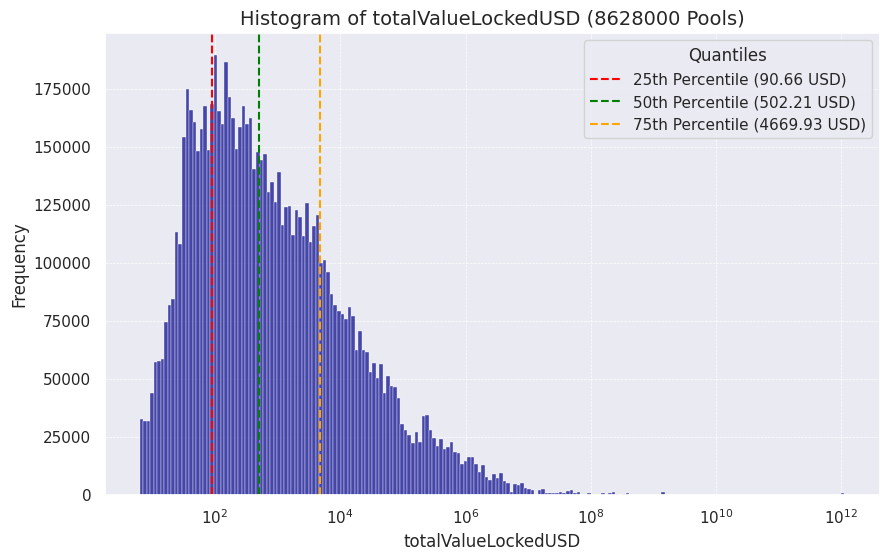

In [67]:
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size

sns.histplot(df['totalValueLockedUSD'], bins=200, log_scale=True, color='darkblue', kde=False, alpha=0.7)
plt.axvline(quantiles[0.25], color='red', linestyle='--', label='25th Percentile')
plt.axvline(quantiles[0.50], color='green', linestyle='--', label='50th Percentile')
plt.axvline(quantiles[0.75], color='orange', linestyle='--', label='75th Percentile')

# Annotate the quantile values with rotated text under the plot
plt.annotate("", xy=(quantiles[0.25], 10), xytext=(quantiles[0.25], -50),
             arrowprops=dict(facecolor='red', arrowstyle="->"))
plt.annotate("", xy=(quantiles[0.50], 10), xytext=(quantiles[0.50], -50),
             arrowprops=dict(facecolor='green', arrowstyle="->"))
plt.annotate("", xy=(quantiles[0.75], 10), xytext=(quantiles[0.75], -50),
             arrowprops=dict(facecolor='orange', arrowstyle="->"))



plt.title(f"Histogram of totalValueLockedUSD ({len(df)} Pools)", fontsize=14)
plt.xlabel("totalValueLockedUSD", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Quantiles", labels=[
    f"25th Percentile ({quantiles[0.25]:.2f} USD)",
    f"50th Percentile ({quantiles[0.50]:.2f} USD)",
    f"75th Percentile ({quantiles[0.75]:.2f} USD)"
])
plt.show()
